In [11]:
#This is to demonstrate how any dataset can be encoded into spikes
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#for compatibility
b2.prefs.codegen.target = 'numpy'

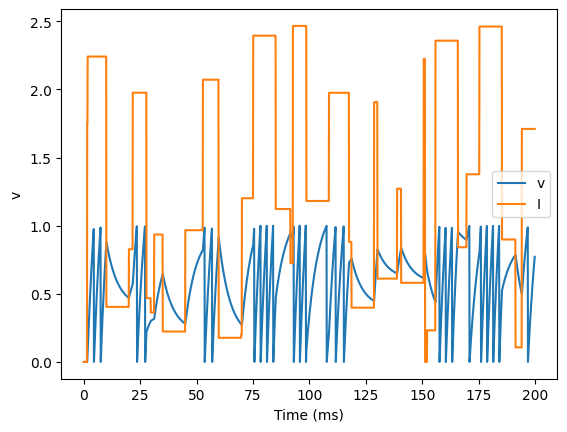

In [14]:
b2.start_scope()
A = 2.5
f = 10*b2.Hz
tau = 5*b2.ms
# Let's create an array that couldn't be
# reproduced with a formula
num_samples = int(200*b2.ms/b2.defaultclock.dt)
I_arr = np.zeros(num_samples)
for _ in range(100):
    a = b2.randint(num_samples)
    I_arr[a:a+100] = b2.rand()
I_recorded = b2.TimedArray(A*I_arr, dt=b2.defaultclock.dt)
eqs = '''
dv/dt = (I-v)/tau : 1
I = I_recorded(t) : 1
'''
G = b2.NeuronGroup(1, eqs, threshold='v>1', reset='v=0', method='exact')
M = b2.StateMonitor(G, variables=True, record=True)
b2.run(200*b2.ms)
plt.plot(M.t/b2.ms, M.v[0], label='v')
plt.plot(M.t/b2.ms, M.I[0], label='I')
plt.xlabel('Time (ms)')
plt.ylabel('v')
plt.legend(loc='best');